In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [4]:
# Read csv
df = pd.read_csv('FuelConsumptionCo2.csv')
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

Emission values with respect to Engine size

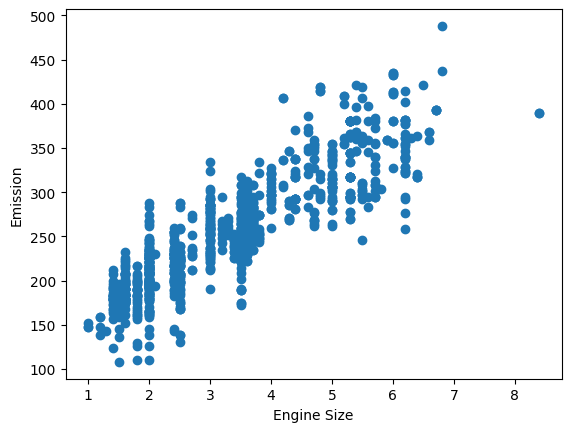

In [7]:
plt.scatter( cdf.ENGINESIZE, cdf.CO2EMISSIONS)
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show()

Creating test and train dataset

In [12]:
from sklearn import linear_model

In [11]:
mask = np.random.rand(len(df)) < 0.8

train = cdf[mask]
test = cdf[~mask]

Training model

In [16]:
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regression = linear_model.LinearRegression()
regression.fit(x, y)
coef_ = regression.coef_
intercept = regression.intercept_
print(intercept, coef_)

# Scikit-learn uses plain Ordinary Least Squares method to calculate intercept and coefficient

[67.72455941] [[11.78599683  7.4499158   9.18646459]]


Prediction

In [17]:
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
y_prediction = regression.predict(x)
print(y_prediction)

[[214.00067512]
 [210.32608928]
 [369.96977801]
 [212.96086223]
 [206.53033701]
 [224.02970085]
 [375.6028232 ]
 [216.63544806]
 [250.67044817]
 [205.61169055]
 [247.9145088 ]
 [310.9474556 ]
 [299.92369808]
 [290.21732704]
 [204.69304409]
 [215.7168016 ]
 [379.41619583]
 [198.26251887]
 [235.97210482]
 [242.40263004]
 [235.97210482]
 [242.40263004]
 [204.69304409]
 [240.56533712]
 [246.07721588]
 [291.25713993]
 [246.07721588]
 [295.85037223]
 [314.22330142]
 [314.22330142]
 [212.96086223]
 [308.71142266]
 [204.69304409]
 [201.01845825]
 [258.93826631]
 [298.16249049]
 [258.66069273]
 [258.66069273]
 [249.75180171]
 [259.57933919]
 [352.89237844]
 [263.25392503]
 [257.74204627]
 [262.33527857]
 [317.06516652]
 [303.28546963]
 [185.67904202]
 [301.81945597]
 [341.36633483]
 [349.25303331]
 [434.13200688]
 [205.73285698]
 [187.51633494]
 [187.51633494]
 [190.27227432]
 [190.27227432]
 [175.05402452]
 [316.56288043]
 [358.82061756]
 [358.82061756]
 [249.47422813]
 [287.13873297]
 [312.09

Evaluation

In [25]:
# MSE evaluation : Mean squared error
print('MSE: %.4f ' % np.mean((y_prediction-y)**2))

# Variance score 1 is perfect
print('Variance score %.2f' % regression.score(x, y))

MSE: 548.7960 
Variance score 0.86


Multiple linear regression using FUELCONSUMPTION_CITY and FUELCONSUMPTION_HWY instead of FUELCONSUMPTION_COMB

In [26]:
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY' ]])
y = np.asanyarray(train[['CO2EMISSIONS']])
regression = linear_model.LinearRegression()
regression.fit(x,y)
coef_ = regression.coef_
intercept_ = regression.intercept_
print(coef_, intercept_)

[[11.84583733  7.09594811  5.95968597  2.95196462]] [68.74585765]


In [31]:
test_x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY' ]])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
y_prediction = regression.predict(test_x)

print('MSE: %.2f' % np.mean((y_prediction - test_y)**2))
print('Variance: %.2f' % regression.score(test_x, test_y))

MSE: 548.16
Variance: 0.86
